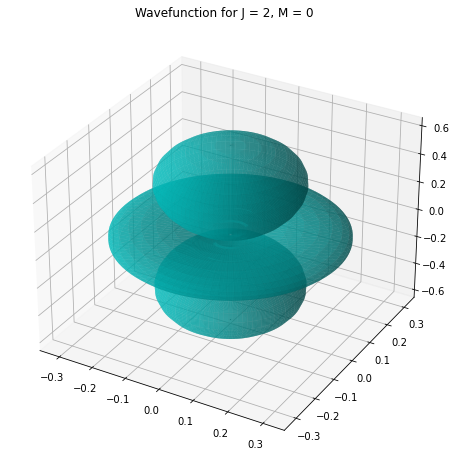

In [2]:
import matplotlib
#%matplotlib notebook


from scipy.special import sph_harm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Quantum numbers
J = 2
M = 0

# Angles
theta, phi = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]

# Spherical harmonics
Y = sph_harm(M, J, theta, phi)

# Cartesian coordinates
r = np.abs(Y)
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
plt.title(f"Wavefunction for J = {J}, M = {M}")
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from ipywidgets import interactive, IntSlider, fixed

def plot_wavefunction(J, M):
    # Ensure M is within the valid range
    M = max(-J, min(J, M))

    # Angles
    theta, phi = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]

    # Spherical harmonics
    Y = sph_harm(M, J, theta, phi)

    # Cartesian coordinates
    r = np.abs(Y)
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)

    # Plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
    plt.title(f"Wavefunction for J = {J}, M = {M}")
    plt.show()

# Slider for J
J_slider = IntSlider(value=0, min=0, max=5, step=1, description="J:")

# Slider for M with range dependent on J
M_slider = IntSlider(value=0, min=-J_slider.value, max=J_slider.value, step=1, description="M:")

# Function to update M slider range
def update_m_range(*args):
    M_slider.min = -J_slider.value
    M_slider.max = J_slider.value

# Linking the update function to changes in J
J_slider.observe(update_m_range, 'value')

# Creating interactive plot
interactive_plot = interactive(plot_wavefunction, J=J_slider, M=M_slider)
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot


interactive(children=(IntSlider(value=0, description='J:', max=5), IntSlider(value=0, description='M:', max=0)…